Importing dependencies

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

Loading data

In [2]:
dataset = pd.read_csv('E:\Projects (ML)\loan_status.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Analysis

In [3]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.groupby('Loan_Status').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,192,187,192,186,192,183,192,192,181,186,179,192
Y,422,414,419,413,422,399,422,422,411,414,385,422


Handling missing values

In [6]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
categorical_columns_with_nan=['Gender','Married','Dependents','Self_Employed']
numerical_columns_with_nan=['LoanAmount','Loan_Amount_Term','Credit_History']

for col in categorical_columns_with_nan:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

for col in numerical_columns_with_nan:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

In [8]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

([<matplotlib.patches.Wedge at 0x2bff35ce7d0>,
 [Text(-0.6105420895241798, 0.9150072988339757, 'Y'),
  Text(0.6105420038550106, -0.9150073559970479, 'N')])

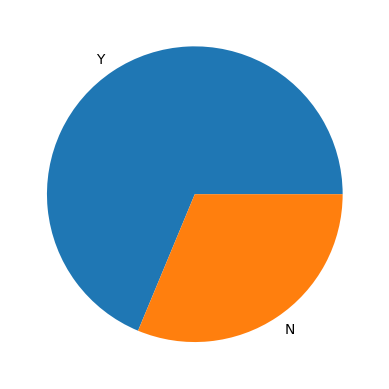

In [9]:
plt.pie(dataset['Loan_Status'].value_counts(), labels=['Y', 'N'])

In [10]:
dataset = dataset.drop(columns = 'Loan_ID', axis = 1)
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [11]:
numerical_columns = ['LoanAmount','Loan_Amount_Term','Credit_History', 'ApplicantIncome', 'CoapplicantIncome']
categorical_columns = categorical_columns_with_nan + ['Education', 'Property_Area', 'Loan_Status']

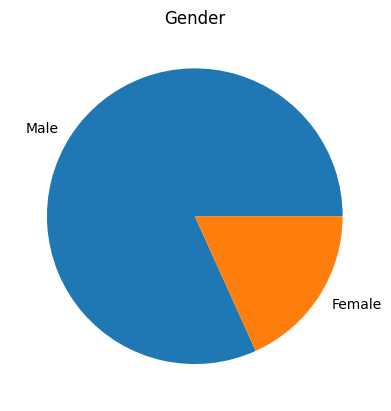

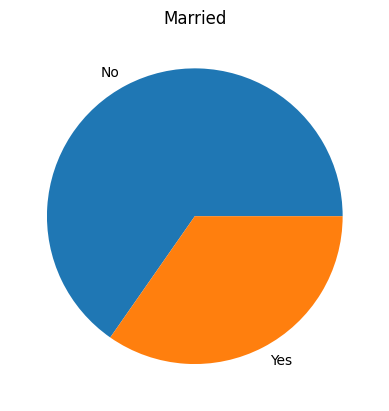

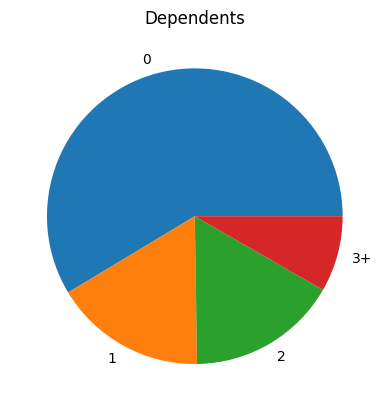

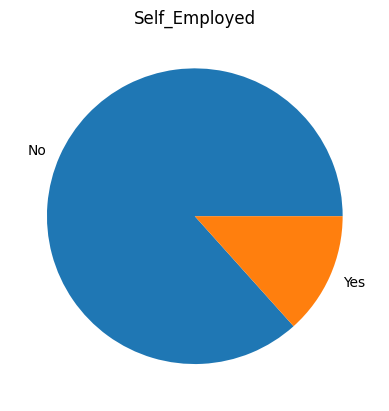

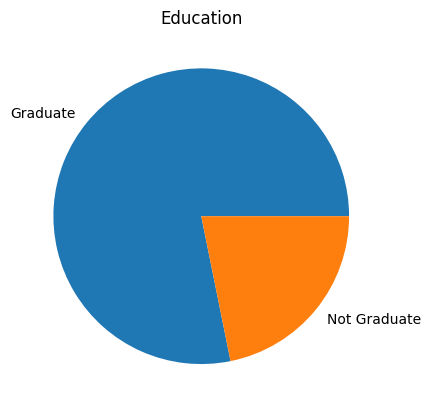

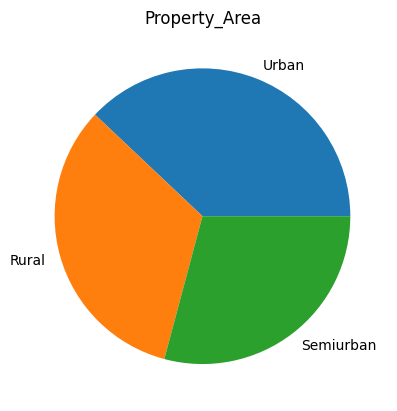

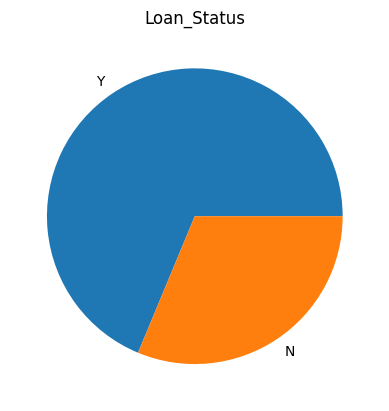

In [12]:

for col in categorical_columns:
    label = []
    for val in dataset[col].values:
        if val not in label:
            label.append(val)
    plt.pie(dataset[col].value_counts(), labels=label)
    plt.title(col)
    plt.show()

Converting Categorical data to Numerical 

In [14]:
dataset.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
dataset.replace({'Married':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'Dependents':{'3+':3}},inplace=True)
dataset.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
dataset.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True)
dataset.replace({'Property_Area':{'Rural':0,'Urban':2,'Semiurban':1}},inplace=True)
dataset.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

C:\Users\Aryan\AppData\Local\Temp\ipykernel_8168\569187566.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_8168\569187566.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Married':{'Yes':1,'No':0}},inplace=True)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_8168\569187566.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

Understanding data

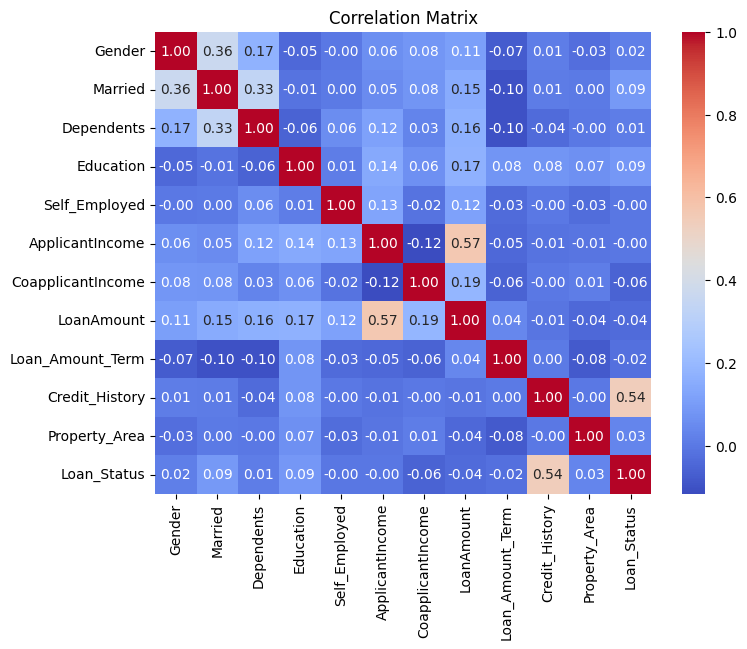

In [15]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Extracting features and target

In [16]:
Y = dataset['Loan_Status']
X = dataset.drop(columns='Loan_Status', axis=1)

In [17]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2


In [18]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Train test Split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

Model Training

In [22]:
model = KNeighborsClassifier(metric='euclidean',n_neighbors=40,weights='distance')
model.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=40, weights='distance')

In [30]:
Y_pred = model.predict(X_test)


In [31]:
acc_score = accuracy_score(Y_test, Y_pred)
print('Accuracy Score: ', acc_score)

Accuracy Score:  0.6935483870967742


Prediction System

In [34]:
input_data = input('Enter the data seperated by comma')
l = [float(x) for x in input_data.split(',')]
outcome = model.predict(np.array(l).reshape(1, -1))
print('Predicted Outcome: ', outcome)

Predicted Outcome:  [0]


c:\Users\Aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
